#M3 PROCESSAMENTO DIGITAL DE SINAIS - PAULO MARTINO HERMANS

DATA: 02/12/2025

Arquivo 'am_96khz.pcm' gerado com sucesso!
Arquivo 'am_96khz_demod.pcm' gerado com sucesso!


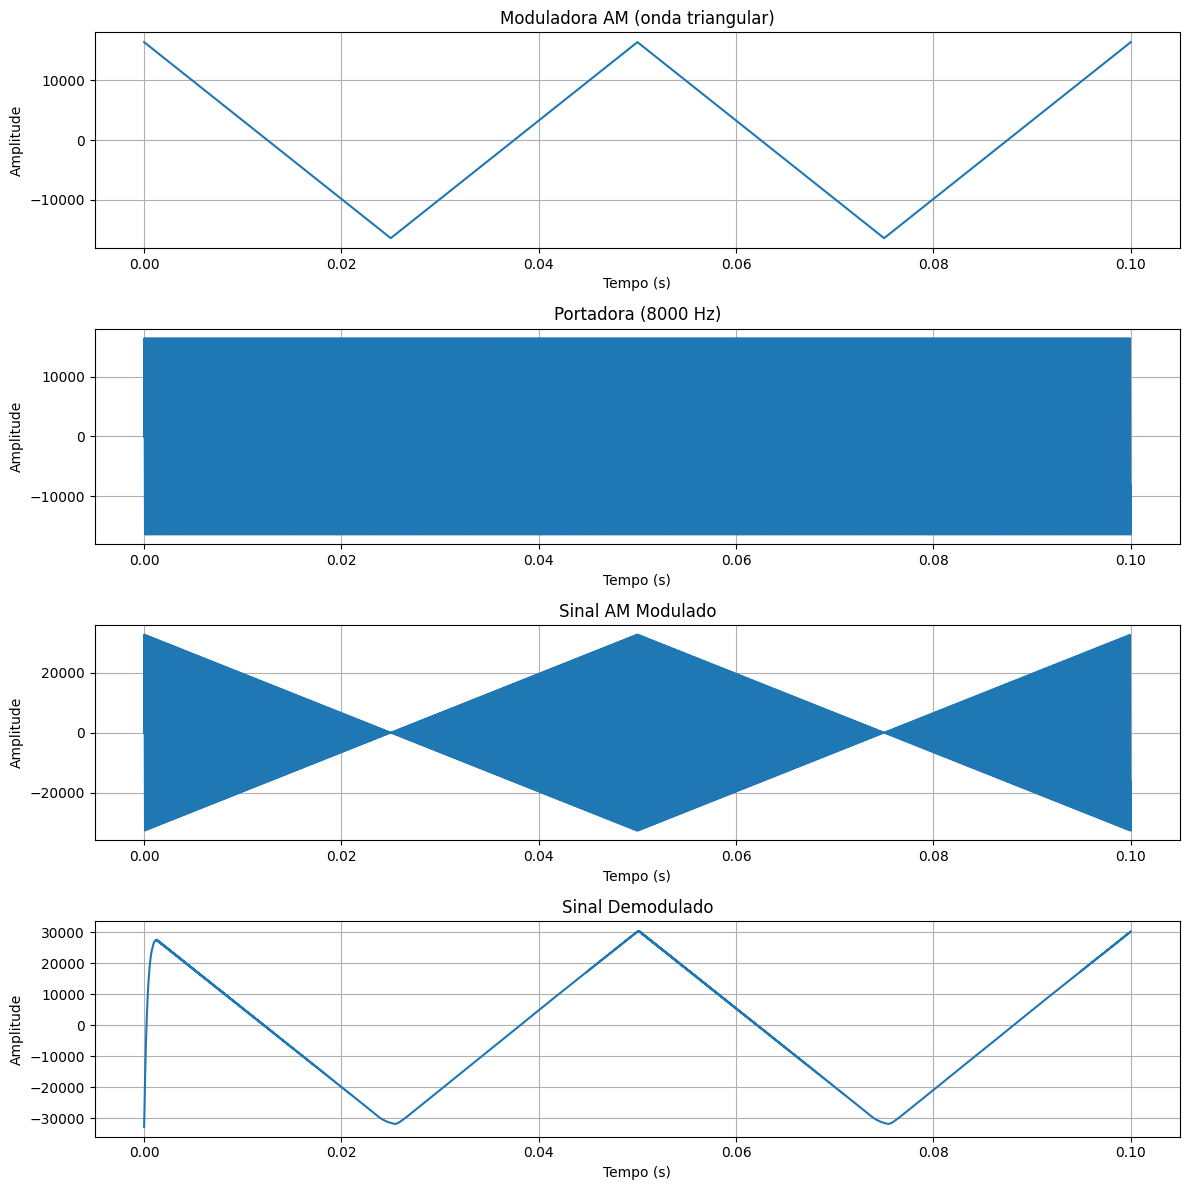

In [1]:
# ============================================================
# PARTE 1 — GERAÇÃO DO SINAL (SEU CÓDIGO ORIGINAL — INALTERADO)
# ============================================================
import numpy as np
import matplotlib.pyplot as plt

Fs = 96000      # Frequência de amostragem
f0 = 8000       # Portadora (Hz)
f_mod = 20      # Moduladora triangular (Hz)
duration = 0.1  # Duração (s)

t = np.linspace(0, duration, int(Fs * duration), endpoint=False)

# Amplitude 16 bits
amplitude = 16384

# ------------------------------------------------------------
# Onda triangular 20 Hz (moduladora)
# ------------------------------------------------------------
x_modulator = amplitude * (2 * np.abs(2*((t*f_mod) % 1) - 1) - 1)

# ------------------------------------------------------------
# Onda seno 8 kHz (portadora)
# ------------------------------------------------------------
x_carrier = amplitude * np.sin(2 * np.pi * f0 * t)

# ------------------------------------------------------------
# Modulação AM simples
# ------------------------------------------------------------
x_modulated = ((x_modulator * x_carrier / 16384) + x_carrier)
x_modulated = np.clip(x_modulated, -32768, 32767)
pcm_data = x_modulated.astype(np.int16)

with open("am_96khz.pcm", "wb") as f:
    f.write(pcm_data.tobytes())

print("Arquivo 'am_96khz.pcm' gerado com sucesso!")


# ============================================================
# PARTE 2 — DEMODULADOR AM (IDÊNTICO AO SEU proc.c)
# ============================================================

# Estados internos — equivalem aos "static int" do C
envelope_state = 0
envelope_out = 0

DECAY_BASE = 7
AM_ZERO_OFFSET = 16384
k_up = 5
k_down = 1

def demod_am_sample(sample):
    """Emula exatamente o demod_am() do C."""
    global envelope_state, envelope_out

    # 1) Absoluto
    x = int(sample)
    if x < 0:
        x = -x

    # aumenta resolução
    x <<= DECAY_BASE

    # 2) Envelope bruto
    if x > envelope_state:
        envelope_state = x
    else:
        envelope_state -= (envelope_state >> DECAY_BASE)

    # 3) Converte para curta escala
    env_short = (envelope_state >> DECAY_BASE)

    # 4) Suavização dinâmica
    if env_short > envelope_out:
        envelope_out += (env_short - envelope_out) >> k_up
    else:
        envelope_out -= (envelope_out - env_short) >> k_down

    # 5) Normalização para short
    out = (envelope_out - AM_ZERO_OFFSET) << 1

    # garante int16 sem overflow
    if out > 32767:
        out = 32767
    elif out < -32768:
        out = -32768

    return np.int16(out)


# ============================================================
# PARTE 3 — PROCESSAMENTO DO ARQUIVO E GERAÇÃO DO RESULTADO
# ============================================================

# lê o arquivo gerado
pcm_in = np.fromfile("am_96khz.pcm", dtype=np.int16)

out = np.zeros_like(pcm_in)

# processa amostra por amostra — igual ao DSP / igual ao C
for i in range(len(pcm_in)):
    out[i] = demod_am_sample(int(pcm_in[i]))

# salva PCM de saída
with open("am_96khz_demod.pcm", "wb") as f:
    f.write(out.tobytes())

print("Arquivo 'am_96khz_demod.pcm' gerado com sucesso!")


# ============================================================
# PARTE 4 — PLOTS: moduladora, portadora, AM, demodulada
# ============================================================

plt.figure(figsize=(12, 12))

# 1) Moduladora
plt.subplot(4, 1, 1)
plt.plot(t, x_modulator)
plt.title("Moduladora AM (onda triangular)")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()

# 2) Portadora
plt.subplot(4, 1, 2)
plt.plot(t, x_carrier)
plt.title("Portadora (8000 Hz)")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()

# 3) Sinal AM modulado
plt.subplot(4, 1, 3)
plt.plot(t, pcm_data)
plt.title("Sinal AM Modulado")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()

# 4) Sinal demodulado
plt.subplot(4, 1, 4)
plt.plot(t, out)
plt.title("Sinal Demodulado")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()


Arquivo 'am_96khz.pcm' gerado com sucesso!
Arquivo 'am_96khz_demod.pcm' gerado com sucesso!


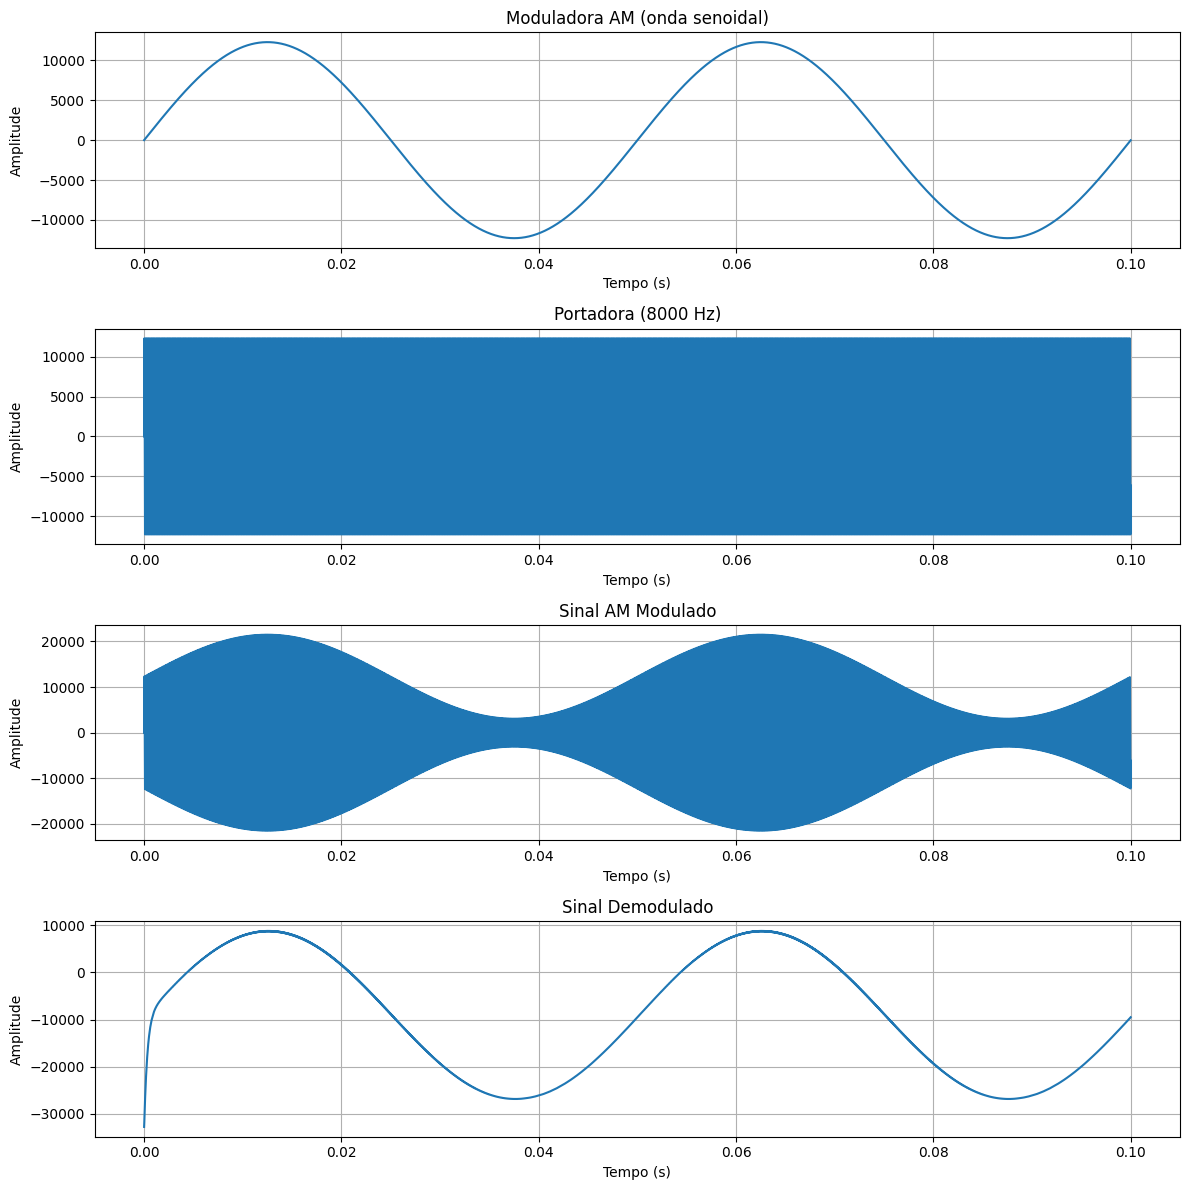

In [2]:
# ============================================================
# PARTE 1 — GERAÇÃO DO SINAL (SEU CÓDIGO ORIGINAL — INALTERADO)
# ============================================================
import numpy as np
import matplotlib.pyplot as plt

Fs = 96000      # Frequência de amostragem
f0 = 8000       # Portadora (Hz)
f_mod = 20      # Moduladora triangular (Hz)
duration = 0.1  # Duração (s)

t = np.linspace(0, duration, int(Fs * duration), endpoint=False)

# Amplitude 16 bits
amplitude = 12288

# ------------------------------------------------------------
# Onda triangular 20 Hz (moduladora)
# ------------------------------------------------------------
x_modulator = amplitude * np.sin(2 * np.pi * f_mod * t)

# ------------------------------------------------------------
# Onda seno 8 kHz (portadora)
# ------------------------------------------------------------
x_carrier = amplitude * np.sin(2 * np.pi * f0 * t)

# ------------------------------------------------------------
# Modulação AM simples
# ------------------------------------------------------------
x_modulated = ((x_modulator * x_carrier / 16384) + x_carrier)
x_modulated = np.clip(x_modulated, -32768, 32767)
pcm_data = x_modulated.astype(np.int16)

with open("am_96khz.pcm", "wb") as f:
    f.write(pcm_data.tobytes())

print("Arquivo 'am_96khz.pcm' gerado com sucesso!")


# ============================================================
# PARTE 2 — DEMODULADOR AM (IDÊNTICO AO SEU proc.c)
# ============================================================

# Estados internos — equivalem aos "static int" do C
envelope_state = 0
envelope_out = 0

DECAY_BASE = 7
AM_ZERO_OFFSET = 16384
k_up = 5
k_down = 1

def demod_am_sample(sample):
    """Emula exatamente o demod_am() do C."""
    global envelope_state, envelope_out

    # 1) Absoluto
    x = int(sample)
    if x < 0:
        x = -x

    # aumenta resolução
    x <<= DECAY_BASE

    # 2) Envelope bruto
    if x > envelope_state:
        envelope_state = x
    else:
        envelope_state -= (envelope_state >> DECAY_BASE)

    # 3) Converte para curta escala
    env_short = (envelope_state >> DECAY_BASE)

    # 4) Suavização dinâmica
    if env_short > envelope_out:
        envelope_out += (env_short - envelope_out) >> k_up
    else:
        envelope_out -= (envelope_out - env_short) >> k_down

    # 5) Normalização para short
    out = (envelope_out - AM_ZERO_OFFSET) << 1

    # garante int16 sem overflow
    if out > 32767:
        out = 32767
    elif out < -32768:
        out = -32768

    return np.int16(out)


# ============================================================
# PARTE 3 — PROCESSAMENTO DO ARQUIVO E GERAÇÃO DO RESULTADO
# ============================================================

# lê o arquivo gerado
pcm_in = np.fromfile("am_96khz.pcm", dtype=np.int16)

out = np.zeros_like(pcm_in)

# processa amostra por amostra — igual ao DSP / igual ao C
for i in range(len(pcm_in)):
    out[i] = demod_am_sample(int(pcm_in[i]))

# salva PCM de saída
with open("am_96khz_demod.pcm", "wb") as f:
    f.write(out.tobytes())

print("Arquivo 'am_96khz_demod.pcm' gerado com sucesso!")


# ============================================================
# PARTE 4 — PLOTS: moduladora, portadora, AM, demodulada
# ============================================================

plt.figure(figsize=(12, 12))

# 1) Moduladora
plt.subplot(4, 1, 1)
plt.plot(t, x_modulator)
plt.title("Moduladora AM (onda senoidal)")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()

# 2) Portadora
plt.subplot(4, 1, 2)
plt.plot(t, x_carrier)
plt.title("Portadora (8000 Hz)")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()

# 3) Sinal AM modulado
plt.subplot(4, 1, 3)
plt.plot(t, pcm_data)
plt.title("Sinal AM Modulado")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()

# 4) Sinal demodulado
plt.subplot(4, 1, 4)
plt.plot(t, out)
plt.title("Sinal Demodulado")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()
